In [1]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
sentences = np.load('bert_sentence_embeddings.npy')
labels = np.load('labels.npy')

X_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, shuffle=True)

weights = compute_class_weight(class_weight='balanced',classes=np.array([0,1]), y=y_train)
model = CatBoostClassifier(iterations=100,
                          learning_rate=0.1,
                          depth=12,
                          class_weights=weights,
                          task_type="GPU",
                           devices='0:1')

model.fit(X_train,y_train)

0:	learn: 0.6462615	total: 243ms	remaining: 24s
1:	learn: 0.6076840	total: 476ms	remaining: 23.3s
2:	learn: 0.5756428	total: 696ms	remaining: 22.5s
3:	learn: 0.5439498	total: 918ms	remaining: 22s
4:	learn: 0.5193633	total: 1.14s	remaining: 21.6s
5:	learn: 0.4956213	total: 1.36s	remaining: 21.3s
6:	learn: 0.4708455	total: 1.58s	remaining: 21s
7:	learn: 0.4415019	total: 1.81s	remaining: 20.9s
8:	learn: 0.4188401	total: 2.06s	remaining: 20.8s
9:	learn: 0.3975288	total: 2.29s	remaining: 20.6s
10:	learn: 0.3781960	total: 2.53s	remaining: 20.4s
11:	learn: 0.3646768	total: 2.75s	remaining: 20.2s
12:	learn: 0.3482206	total: 2.98s	remaining: 19.9s
13:	learn: 0.3348535	total: 3.21s	remaining: 19.7s
14:	learn: 0.3213128	total: 3.45s	remaining: 19.6s
15:	learn: 0.3086137	total: 3.69s	remaining: 19.4s
16:	learn: 0.2952301	total: 3.94s	remaining: 19.2s
17:	learn: 0.2848347	total: 4.16s	remaining: 18.9s
18:	learn: 0.2734037	total: 4.38s	remaining: 18.7s
19:	learn: 0.2634376	total: 4.6s	remaining: 18.

C:\Users\Sergei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


best F1 =  0.41411764705882353
precision =  0.3548387096774194
recall =  0.4971751412429379


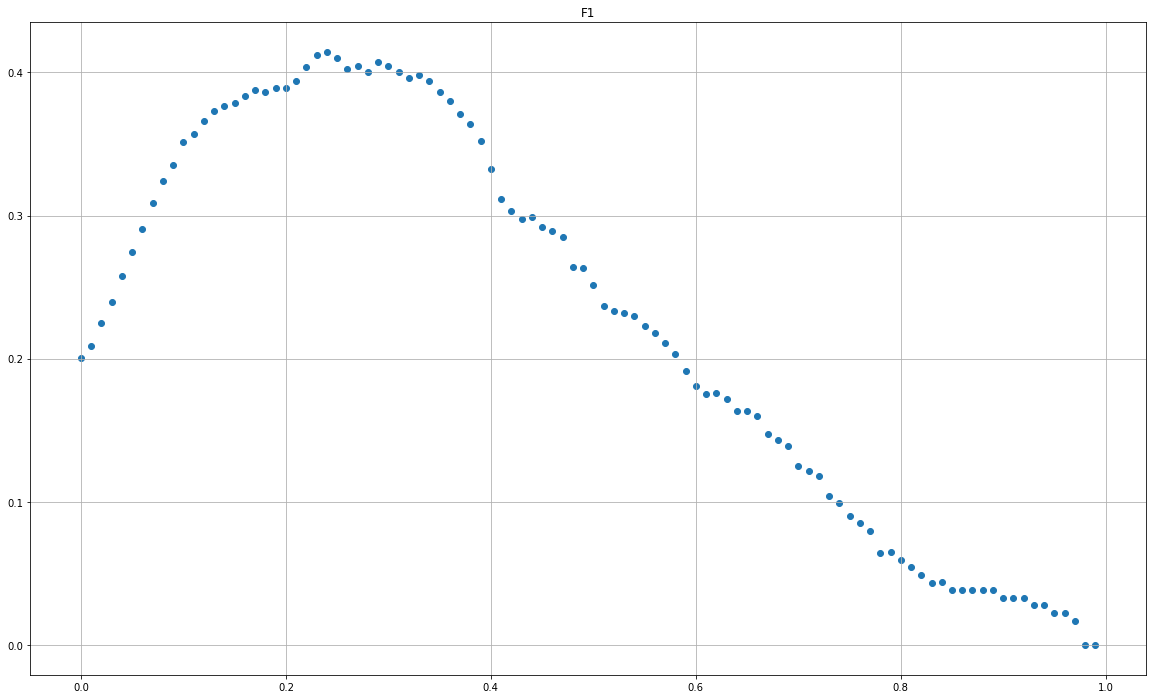

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = model.predict_proba(x_test)
def preds_with_tr(tr, proba):
    pr = proba[:, 1]
    ans = (pr>tr).astype(int)
    return ans

precisions = []
recalls = []
f1s = []
for t in np.arange(0.,1.,0.01):
    prediction = preds_with_tr(t, proba)
    precisions.append(precision_score(y_test, list(prediction)))
    recalls.append(recall_score(y_test, list(prediction)))
    f1s.append(f1_score(y_test, list(prediction)))
    
print('best F1 = ', max(f1s))
i = np.array(f1s).argmax()
print('precision = ', precisions[i])
print('recall = ', recalls[i])


plt.figure(figsize = (20,12))
plt.grid()
plt.title('F1')
plt.scatter(np.arange(0.,1.,0.01), f1s)
plt.show()